In [1]:
from layers import MultiHeadAttention, PositionalEncoding, InputEmbeddings

In [2]:
import transformers
print(f'Transformers version: {transformers.__version__}')

Transformers version: 4.49.0


In [3]:
import torch
try:
    from transformers import AutoTokenizer
except ImportError:
    print('Ups, al parecer no esta instaladas las dependencias.')

In [4]:
frase = "habia una vez una gata llamada Luna que comia mucho"
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokens = tokenizer(frase, return_tensors='pt')
input_ids = tokens["input_ids"]

In [5]:
print(f'vocab_size: {tokenizer.vocab_size}')

vocab_size: 50257


In [6]:
tokens

{'input_ids': tensor([[ 5976,   544,   555,    64,  1569,    89,   555,    64,   308,  1045,
         32660,   321,  4763, 23694,  8358,   401,   544,   881,    78]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [7]:
tokens['input_ids']

tensor([[ 5976,   544,   555,    64,  1569,    89,   555,    64,   308,  1045,
         32660,   321,  4763, 23694,  8358,   401,   544,   881,    78]])

In [ ]:
attention_mask = tokens['attention_mask']
attention_mask

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [16]:
attention_mask.shape

torch.Size([1, 19])

In [9]:
vocab_size = tokenizer.vocab_size
d_model = 512
num_layers = 6
num_heads = 8
d_ff = 2048
dropout = 0.3
max_seq_length = 64
batch_size = input_ids.shape[0]

In [10]:
input_ids.shape

torch.Size([1, 19])

# vamos a empezar a armar el TRANSformer

In [11]:
print(f'vocab size: {vocab_size}, d_model:{d_model}, shape_tensor: {input_ids.shape}')

vocab size: 50257, d_model:512, shape_tensor: torch.Size([1, 19])


In [12]:
input = InputEmbeddings(vocab_size, d_model)
embedding = input(input_ids)

In [13]:
embedding.shape, embedding

(torch.Size([1, 19, 512]),
 tensor([[[ 18.6533, -28.3129, -24.5760,  ..., -19.5977,  59.8200,   7.3892],
          [-18.9165, -19.3599, -14.6095,  ...,  14.8463,  17.5690, -32.1851],
          [ -2.6173, -15.0707,   9.3103,  ...,  -6.4824,  12.0897,  -3.1947],
          ...,
          [-18.9165, -19.3599, -14.6095,  ...,  14.8463,  17.5690, -32.1851],
          [  2.6401, -35.8540, -17.1688,  ..., -20.0905, -18.1024,  -1.3459],
          [ -9.6881,   8.2474,  28.1790,  ...,  19.4252,  -3.4898,   1.3432]]],
        grad_fn=<MulBackward0>))

In [14]:
pos_enc = PositionalEncoding(d_model, max_seq_length)
positional_encoding = pos_enc(embedding)

In [15]:
positional_encoding.shape, positional_encoding

(torch.Size([1, 19, 512]),
 tensor([[[ 18.6533, -27.3129, -24.5760,  ..., -18.5977,  59.8200,   8.3892],
          [-18.0750, -18.8196, -13.7877,  ...,  15.8463,  17.5691, -31.1851],
          [ -1.7080, -15.4869,  10.2467,  ...,  -5.4824,  12.0899,  -2.1947],
          ...,
          [-19.2044, -20.3176, -14.3396,  ...,  15.8463,  17.5706, -31.1851],
          [  1.6787, -36.1291, -17.8063,  ..., -19.0905, -18.1007,  -0.3459],
          [-10.4391,   8.9077,  27.1827,  ...,  20.4252,  -3.4880,   2.3432]]],
        grad_fn=<AddBackward0>))

In [20]:
x = positional_encoding
mask = attention_mask.unsqueeze(1).unsqueeze(2).shape
attention = MultiHeadAttention(d_model, num_heads)
output_attention, weight_attention = attention(x,x,x,mask=attention_mask, return_attention=True)

In [26]:
weight_attention.shape, weight_attention[0][0][0]

(torch.Size([1, 8, 19, 19]),
 tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2851e-14, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 6.7011e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 5.0462e-40, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00], grad_fn=<SelectBackward0>))

# matriz de atención

In [27]:
import matplotlib.pyplot as plt

In [32]:
head = 0
attn = weight_attention[0, head].detach().cpu().numpy()

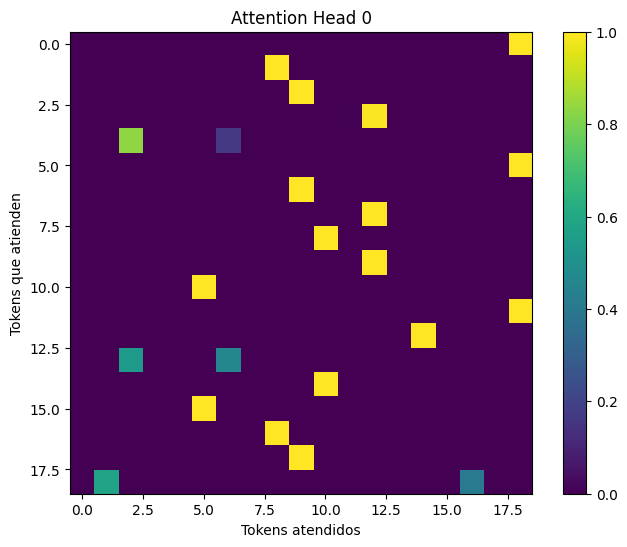

In [34]:
plt.figure(figsize=(8,6))
plt.imshow(attn, cmap='viridis')
plt.colorbar()
plt.title(f'Attention Head {head}')
plt.xlabel('Tokens atendidos')
plt.ylabel('Tokens que atienden')
plt.show()

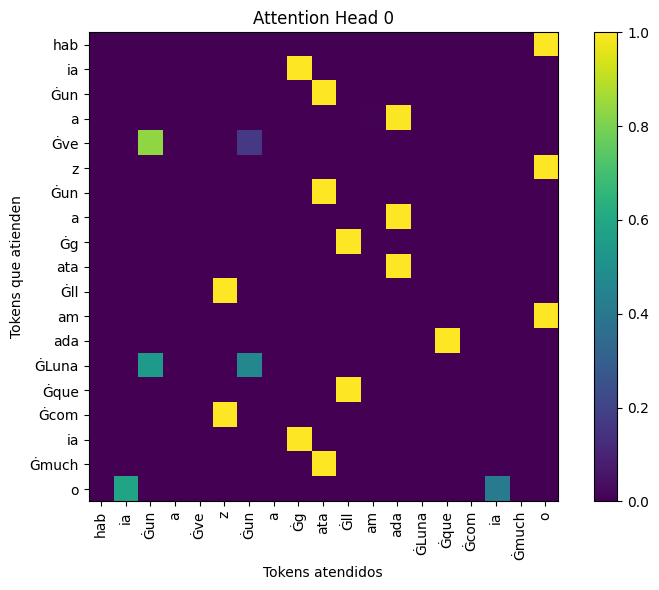

In [36]:
t = tokenizer.convert_ids_to_tokens(input_ids[0])

plt.figure(figsize=(8,6))
plt.imshow(attn, cmap='viridis')
plt.colorbar()
plt.title(f'Attention Head {head}')
plt.xticks(range(len(t)), t, rotation=90)
plt.yticks(range(len(t)), t)
plt.xlabel('Tokens atendidos')
plt.ylabel('Tokens que atienden')
plt.tight_layout()
plt.show()